In [40]:
# ==============================
# Logistic Regression for Churn Prediction (Final Code)
# ==============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [41]:
# ==============================
# 1. Load Dataset
# ==============================
df = pd.read_csv("/content/churn-bigml-80.csv")

# Drop customerID if exists
if "customerID" in df.columns:
    df.drop("customerID", axis=1, inplace=True)

# Encode target
df["Churn"] = df["Churn"].map({True: 1, False: 0})

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Features & target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================
# 2. Handle Imbalance with SMOTE
# ==============================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [42]:
# ==============================
# 3. Train Logistic Regression Model
# ==============================
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [43]:
# Predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# ==============================
# 4. Best Threshold (0.15)
# ==============================
best_threshold = 0.5
y_pred_final = (y_pred_prob >= best_threshold).astype(int)

print(f"\nClassification Report (Threshold={best_threshold}):")
print(classification_report(y_test, y_pred_final))
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall:", recall_score(y_test, y_pred_final))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_final))


Classification Report (Threshold=0.5):
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       456
           1       0.32      0.63      0.42        78

    accuracy                           0.75       534
   macro avg       0.62      0.70      0.63       534
weighted avg       0.84      0.75      0.78       534

Accuracy: 0.7509363295880149
Precision: 0.3202614379084967
Recall: 0.6282051282051282
Balanced Accuracy: 0.7000674763832658


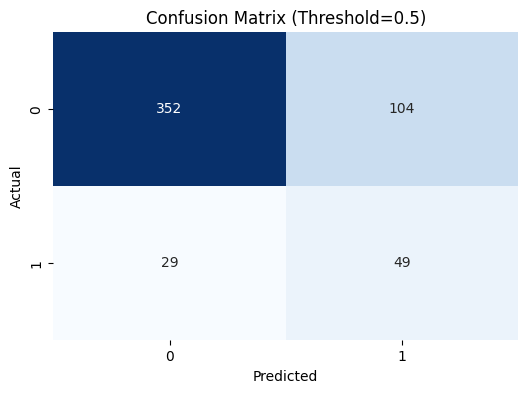

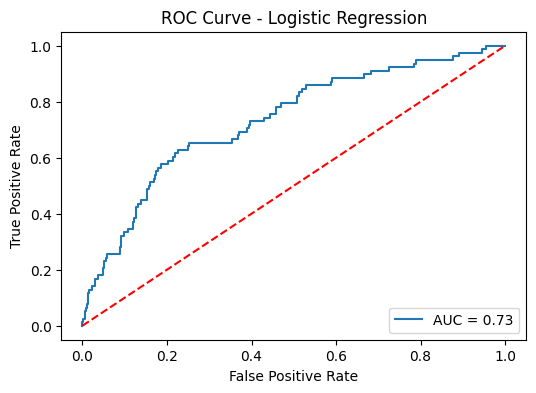

In [44]:
# ==============================
# 5. Confusion Matrix
# ==============================
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold={best_threshold})")
plt.show()

# ==============================
# 6. ROC Curve
# ==============================
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()